# **Data Analysis Project: Capital Bikeshare System**
* Name: Nicko Arya Dharma
* Email: nicko.arya.dharma@gmail.com
* ID Dicoding: nickoaryad

_____

## 📖 **Introduction**

### *1. Overview*   
Bike sharing system is bicycle rental services wherein a network of kiosk locations automates the membership, payment, rental, and return of bicycle processes. Under such schemes, riders can rent bicycles using manual automated kiosks spread across the city for defined periods. In most cases, riders can pick up bikes from one location and return them to any other designated place. There are already more than 500 bike sharing programs operating worldwide, with over 500 thousand bicycles.   

Bike sharing system is on the rise, providing affordable alternatives to popular existing forms of transportation for short trips. Furthermore, this system address community issues including traffic congestion, and serve the public through environmental, health, economic, and social benefits. There are a lot of advantages to bike rents, it is convenient because it permits people not to keep the bike all day long, whether it is at work or at school. Furthermore it is the healthiest way to travel and it has many environmental benefits.   

The bike sharing platforms from across the world are hotspots of all sorts of data, ranging from travel time, start and end location, demographics of riders, and so on. This data along with alternate sources of information such as weather, traffic, terrain, and so on makes it an attractive proposition for different research areas. In contrast to other modes of transportation like buses and subways, these systems openly record the length of journey, the point of departure, and the point of arrival. With the use of this function, the bike sharing program may be utilized to sense city mobility by acting as a virtual sensor network.     

Bike sharing platforms urgently need to understand the demands in this bike sharing system. In particular, they aim to identify the variables that are affecting the demand, how well those variables describe the demand, and which variables are significant in predicting the demand based on various weather surveys and people's lifestyles. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### *2. Data Set*
The seasonal and environmental contexts have a significant influence on the bike-sharing rental process. For example, the rental habits may be impacted by the weather, precipitation, day of the week, season, hour of the day, etc. The two-year historical log from the Capital Bikeshare system in Washington, D.C., USA that corresponds to the years 2011 and 2012 makes up the core data collection. It may be accessed by the public at http://capitalbikeshare.com/system-data. After combining the data on an hourly and daily basis, we took the relevant seasonal and meteorological data and incorporated it. The source of the weather data is http://www.freemeteo.com.   

<table style = 'float:left;'>
    <tr>
        <th>Variable</th>
        <th>Data Type</th>
        <th>Caption</th>
    </tr>
    <tr>
        <td>instant</td>
        <td>Integer</td>
        <td>Record index</td>
    </tr>
    <tr>
        <td>dteday</td>
        <td>Object</td>
        <td>Date</td>
    </tr>
    <tr>
        <td>season</td>
        <td>Integer</td>
        <td>Season</td>
    </tr>
    <tr>
        <td>yr</td>
        <td>Integer</td>
        <td>Year (2011 or 2012)</td>
    </tr>
    <tr>
        <td>mnth</td>
        <td>Integer</td>
        <td>Month</td>
    </tr>
    <tr>
        <td>holiday</td>
        <td>Integer</td>
        <td>Holiday. or non-holiday</td>
    </tr>
    <tr>
        <td>weekday</td>
        <td>Integer</td>
        <td>Day of week</td>
    </tr>
    <tr>
        <td>workingday</td>
        <td>Integer</td>
        <td>Either holiday/weekend, or not</td>
    </tr>
    <tr>
        <td>weathersit</td>
        <td>Integer</td>
        <td>Weather situation</td>
    </tr>
    <tr>
        <td>temp</td>
        <td>Float</td>
        <td>Normalized temperature</td>
    </tr>
    <tr>
        <td>atemp</td>
        <td>Float</td>
        <td>Normalized feeling temperature</td>
    </tr>
    <tr>
        <td>hum</td>
        <td>Float</td>
        <td>Normalized humidity</td>
    </tr>
    <tr>
        <td>windspeed</td>
        <td>Float</td>
        <td>Normalized windspeed</td>
    </tr>
    <tr>
        <td>casual</td>
        <td>Integer</td>
        <td>Casual riders count</td>
    </tr>
    <tr>
        <td>registered</td>
        <td>Integer</td>
        <td>Registered members count</td>
    </tr>
    <tr>
        <td>cnt</td>
        <td>Integer</td>
        <td>Total count of Casual and Registered</td>
    </tr>
</table>

___________

## 📖 **Business Problems**

### *1. What is the trend of bike rides count during observation range of 2011-2012?*   
### *2. When do the popular times Capital Bikeshare riders ride?*   
### *3. How do registered members and casual riders use Capital Bikeshare bikes differently?*     
### *4. How is bike rides count per hour in function of seasons and weather conditions?*   

_____

## 📖 **Importing Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
#from google.colab import files
import zipfile

import datetime
import calendar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

_____

## 📖 **Data Wrangling**

### *1. Loading Data*
The dataset used in this project is derived from **Capital Bikeshare System** and is made available through **Google Drive** by **Dicoding**. To download those files, we need to execute these following `gdown` command.

In [2]:
#!gdown 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ

Execute `zipfile` command to extract files.

In [3]:
#local_zip = 'Bike-sharing-dataset.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('bike-sharing-dataset')
#zip_ref.close()

Execute following command to look up the unzip directory.

In [4]:
#base_dir = 'bike-sharing-dataset/'
#print(os.listdir(base_dir))

### *2. Gathering Data*
Importing the given csv files to dataframe using `Pandas` library.

In [5]:
# Loading data hour.csv
df = pd.read_csv('https://raw.githubusercontent.com/nickoaryad/IDCamp2023-Capital-Bikeshare/main/dataset/hour.csv')

In [6]:
# Displaying the first 5 rows of dataframe
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
# Displaying dataframe shape
df.shape

(17379, 17)

### *3. Assessing Data*
Inspect the data for any null or missing value, duplication, unwanted value, and inaccurate data type.  

**3.1. Inspect for any null or missing value**

In [8]:
# Inspect any null or missing value in column wise
(df.isnull().mean()/100).sort_values(ascending=False)

instant       0.0
weathersit    0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
workingday    0.0
dteday        0.0
weekday       0.0
holiday       0.0
hr            0.0
mnth          0.0
yr            0.0
season        0.0
cnt           0.0
dtype: float64

In [9]:
# Inspect any null or missing value in row wise
(df.isnull().mean(axis=1)/100).sort_values(ascending=False)

0        0.0
11591    0.0
11577    0.0
11578    0.0
11579    0.0
        ... 
5798     0.0
5799     0.0
5800     0.0
5801     0.0
17378    0.0
Length: 17379, dtype: float64

**Result** : 
* No null or missing value both in column and row wise.

**3.2. Inspect for any duplication**

In [10]:
print("Number of duplication: ", df.duplicated().sum())

Number of duplication:  0


**Result** :
* No duplication

**3.3. Inspect for any unwanted value**

In [11]:
# Displaying all unique values number of each variable
df.nunique().sort_values()

workingday        2
yr                2
holiday           2
season            4
weathersit        4
weekday           7
mnth             12
hr               24
windspeed        30
temp             50
atemp            65
hum              89
casual          322
dteday          731
registered      776
cnt             869
instant       17379
dtype: int64

In [12]:
# Displaying all unique values and its' number of each variable
df_inspect=df.iloc[:,1:16]
for col in df_inspect:
    print(df_inspect[col].value_counts(ascending=False), '\n')

dteday
2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: count, Length: 731, dtype: int64 

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64 

yr
1    8734
0    8645
Name: count, dtype: int64 

mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64 

hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64 

holiday
0    16879
1      500
Name: count, dtype: int64 

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64 

workingday
1    11865
0     5514
Name: 

**Result** :   
* No unwanted value. All values are within the valid data range.
* Some values need to be encoded from numerical to their respective categorical values

**3.4. Inspect for any inaccurate data type**

In [13]:
# Displaying data type of all variables
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

**Result** :   
* Data type of `dteday` variable need to be changed from `object` to `datetime`

**3.5. Review Summary Statistics**

In [14]:
# Displaying Summary Statistics
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**SUMMARY OF ASSESSING DATA RESULTS**   

<table style = 'float:left;'>
    <tr>
        <th>Variable</th>
        <th>Action Needed</th>
    </tr>
    <tr>
        <td>dteday</td>
        <td>Change data type to datetime</td>
    </tr>
    <tr>
        <td>season</td>
        <td>Encode value to its respective category (season: Summer, Fall, Winter, Spring)</td>
    </tr>
    <tr>
        <td>yr</td>
        <td>Encode value to its respective category (2011 or 2012)</td>
    </tr>
    <tr>
        <td>mnth</td>
        <td>Encode value to its respective category (month: January to December)</td>
    </tr>
    <tr>
        <td>weekday</td>
        <td>Encode value to its respective category (day of week: Sunday to Saturday)</td>
    </tr>
    <tr>
        <td>workingday</td>
        <td>Encode value to its respective category (either holiday/weekend or workday)</td>
    </tr>
    <tr>
        <td>weathersit</td>
        <td>Encode value to its respective category (weather situation: Clear, Cloudy, Light rain, or Heavy rain)</td>
    </tr>
    <tr>
        <td>temp</td>
        <td>Change value to its original value before normalized (= temp * 41)</td>
    </tr>
    <tr>
        <td>atemp</td>
        <td>Change value to its original value before normalized (= atemp * 50)</td>
    </tr>
    <tr>
        <td>hum</td>
        <td>Change value to its original value before normalized (= hum * 100)</td>
    </tr>
    <tr>
        <td>windspeed</td>
        <td>Change value to its original value before normalized (= windspeed * 67)</td>
    </tr>
</table>

### *4. Cleaning Data*
Carry out cleaning data based on the assessment result above.

**4.1. Change `dteday` data type to `datetime`**

In [15]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [16]:
# Checking 'dteday' data type
df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

**4.2. Encode value of `season` variable**

In [17]:
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in df['season']:
    season = find_season(season)
    season_list.append(season)
    
df['season'] = season_list

**4.3. Encode value of `yr`, `mnth`, `weekday` variables**

In [18]:
df['yr'] = df['dteday'].dt.year
df['mnth'] = df['dteday'].dt.month_name()
df['weekday'] = df['dteday'].dt.day_name()

**4.4. Encode value of `workingday` either to *holiday/weekday* or *workday***

In [19]:
def find_workingday(workingday):
    workingday_string = {0:'Holiday/Weekend', 1:'Workday'}
    return workingday_string.get(workingday)

workingday_list = []

for workingday in df['workingday']:
    workingday = find_workingday(workingday)
    workingday_list.append(workingday)
    
df['workingday'] = workingday_list

**4.5. Encode value of `weathersit` variable**

In [20]:
def find_weathersit(weathersit):
    weathersit_string = {1:'Clear/Few Clouds', 2:'Mist+Cloudy', 3:'Light Rain/Snow', 4:'Heavy Rain/Snow'}
    return weathersit_string.get(weathersit)

weathersit_list = []

for weathersit in df['weathersit']:
    weathersit = find_weathersit(weathersit)
    weathersit_list.append(weathersit)
    
df['weathersit'] = weathersit_list

**4.6. Change value of `temp`, `atemp`, `hum`, `windspeed` variables to its' original value before normalized**

In [21]:
df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['hum'] = df['hum']*100
df['windspeed'] = df['windspeed']*67

**4.7. Recheck results of cleaning data**

In [22]:
# Displaying dataframe after cleaning data
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,Holiday/Weekend,Clear/Few Clouds,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,Holiday/Weekend,Clear/Few Clouds,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,Holiday/Weekend,Clear/Few Clouds,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,Holiday/Weekend,Clear/Few Clouds,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,Holiday/Weekend,Clear/Few Clouds,9.84,14.395,75.0,0.0,0,1,1


In [23]:
# Displaying data type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int32         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### *5. Saving Data*
Saving the ready-to-go data as a new file.

In [24]:
df.to_csv("dashboard/hour_clean.csv", index=False)
#data_clean = 'data.csv'
#df_day.to_csv(data_clean, index=False)
#files.download(data_clean)

_____

## 📖 **Exploratory Data Analysis**

### *1. Univariate Analysis*
Univariate analysis is carried out to understand the distribution of values for a single variable. In this project, univariate analysis will be performed to `float` data type variables i.e. `temp`, `atemp`, `hum`, `windspeed`, and to integer data type variables i.e. `casual`, `registered`, `cnt`. Univariate analysis will help us to recognize patterns of data from either measures of dispersion or measures of central tendency.

**1.1. Summary Statistics**

In [25]:
# Displaying Summary Statistics of float data type variables
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_float = df[float_vars]

df_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


In [26]:
# Displaying Summary Statistics of integer data type variables
int_vars = ['casual', 'registered', 'cnt']
df_int = df[int_vars]

df_int.describe()

,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088
std,49.305030,151.357286,181.387599
min,0.000000,0.000000,1.000000
25%,4.000000,34.000000,40.000000
50%,17.000000,115.000000,142.000000
75%,48.000000,220.000000,281.000000
max,367.000000,886.000000,977.000000


**RESULT** :
* Summary Statistics of which Mean, Median, and Max shows that `temp`, `atemp`, `hum` variables data are **normally distributed**. Whilst `windspeed` variable data is **right skewed**.
* Summary Statistics of which Mean, Median, and Max shows that `casual`, `registered`, and `cnt` variables data are **right skewed**.

**1.2. Histogram**

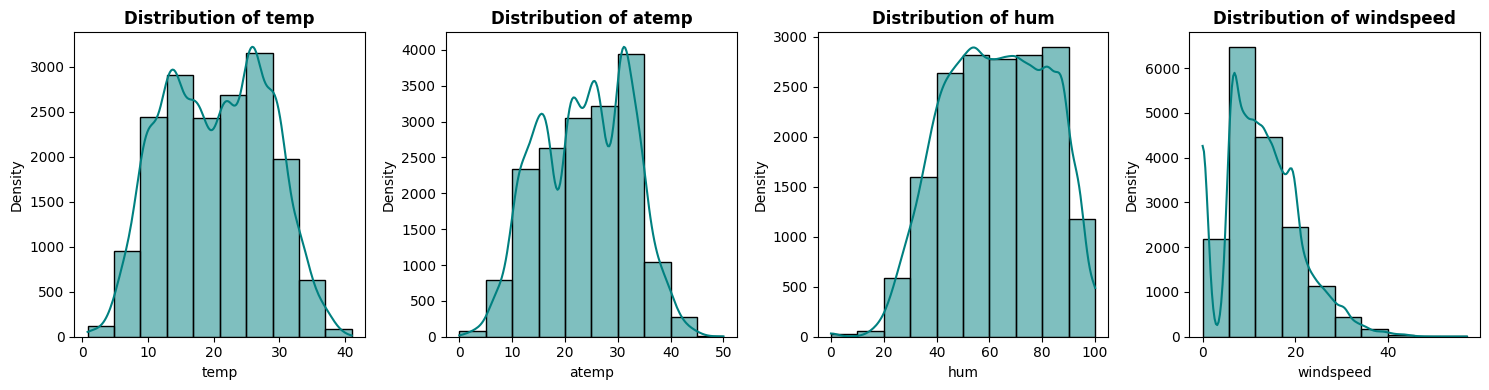

In [27]:
# Displaying histogram of float data type variables
fig, axs = plt.subplots(1, 4, figsize=(15,4))
for i, ax in enumerate(axs):
    sns.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='teal')    
    ax.set_title("Distribution of " + float_vars[i], fontweight='bold')
    ax.set_xlabel(float_vars[i])
    ax.set_ylabel("Density")
plt.tight_layout()
plt.show()

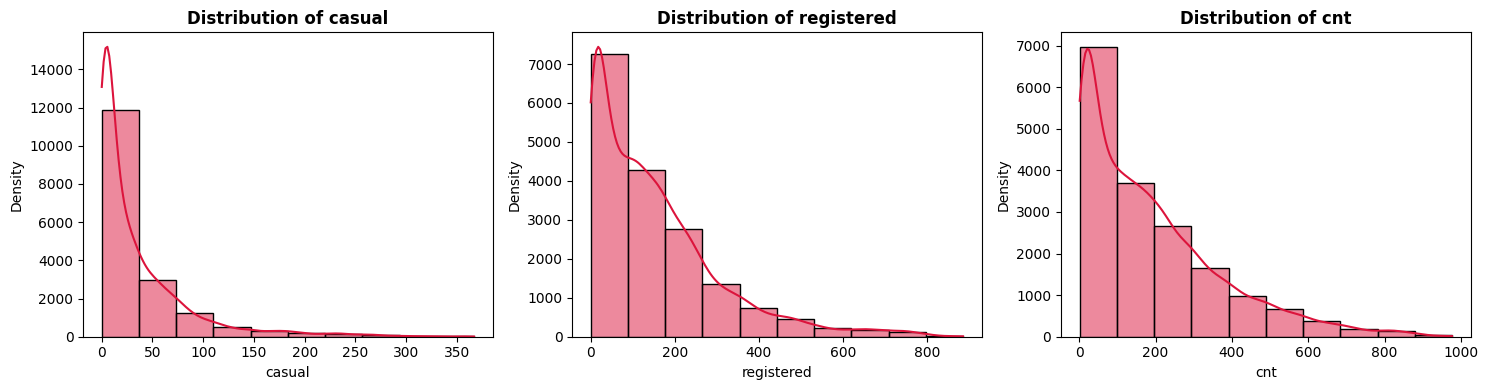

In [28]:
# Displaying histogram of integer data type variables
fig, axs = plt.subplots(1, 3, figsize=(15,4))
for i, ax in enumerate(axs):
    sns.histplot(x=df_int[int_vars[i]], ax=ax, kde=True, bins=10, color='crimson')
    ax.set_title("Distribution of " + int_vars[i], fontweight='bold')
    ax.set_xlabel(int_vars[i])
    ax.set_ylabel("Density")
plt.tight_layout()
plt.show()

**RESULT** :   
* Histogram shows that `temp`, `atemp`, and `hum` variables data are **normally distributed**, whilst `windspeed` variable data is **right skewed**.
* Histogram shows that `casual`, `registerd`, and `cnt` variables data are **right skewed**.

**1.3. Boxplot**

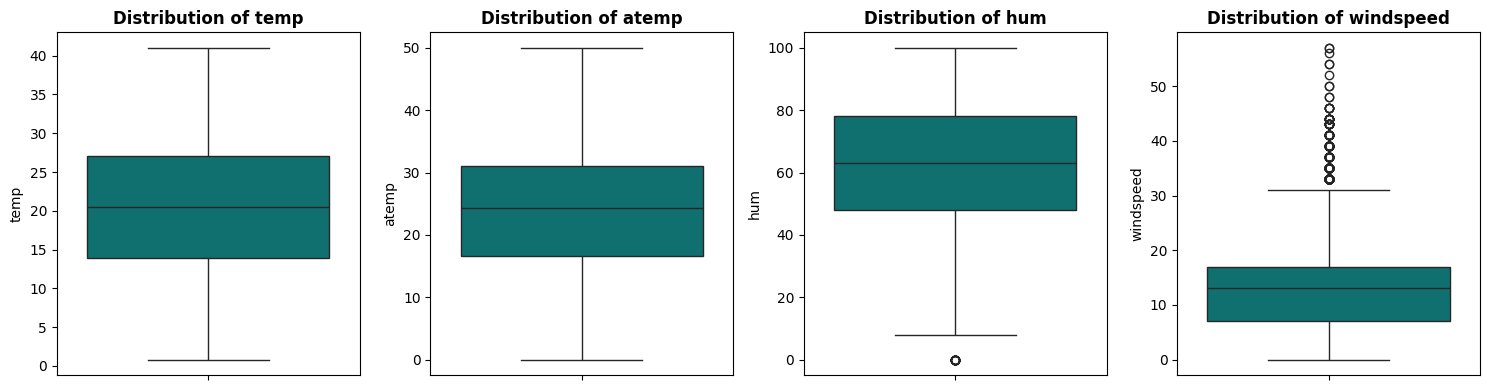

In [29]:
# Displaying boxplot of float data type variables
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
for i, ax in enumerate(axs):
    sns.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='teal')
    ax.set_title("Distribution of " + float_vars[i], fontweight='bold')
    ax.set_ylabel(float_vars[i])
plt.tight_layout()
plt.show()


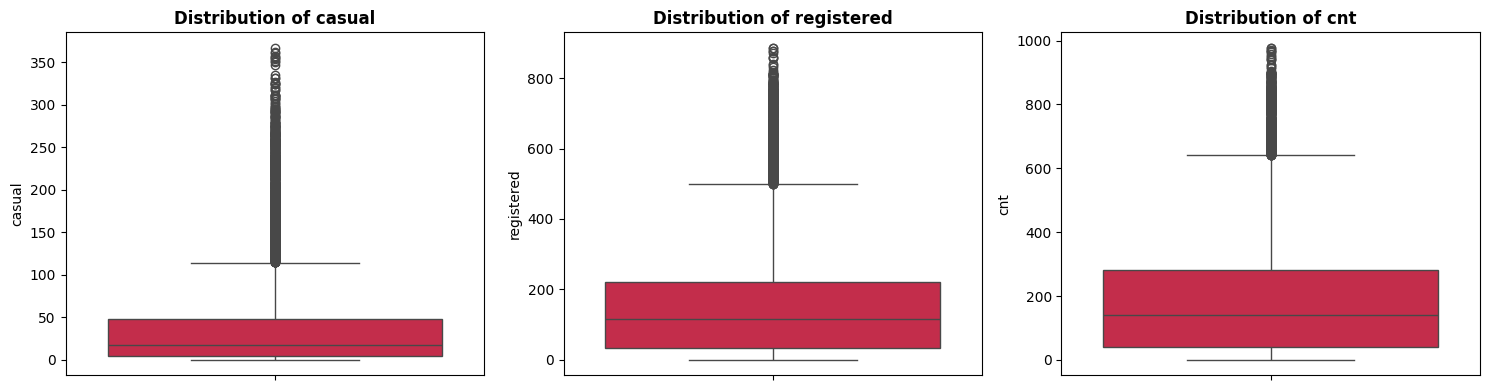

In [30]:
# Displaying boxplot of integer data type variables
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, ax in enumerate(axs):
    sns.boxplot(y=df_int[int_vars[i]], orient='v', ax=ax, color='crimson')
    ax.set_title("Distribution of " + int_vars[i], fontweight='bold')
    ax.set_ylabel(int_vars[i])
plt.tight_layout()
plt.show()

**RESULT** :
* Boxplot shows that there is **no outlier** for `temp`, `atemp`, dan `hum` variables. Whilst there is **outlier exist** for `windspeed` variable.
* Boxplot shows that there is **outlier exist** for `casual`, `registered`, dan `cnt` variables.
* We will not drop the outliers since it is a possibility to happened that windspeed could reach 56.9 miles per hour during extreme bad weather, also counts of 977 bikes could possibly be reached during a certain rush seasons.

### *2. Multivariate Analysis*
Multivariate analysis is used to study multiple variables in a set of data to draw cause-and-effect conclusions, and also be used to compare multivariate sample means. Multivariate analysis can help companies make data-driven decisions by taking into account multiple sets of data. In this project, multivariate analysis will be utilized to draw correlation amongst variables from given dataset, i.e. total counts of bikes versus season or weather situation by hour, day of week, or month wise. The analysis hopefully could give answers to prior stated business problems and provide useful insight for further decisions making.

**2.1. Bike rides count by date**

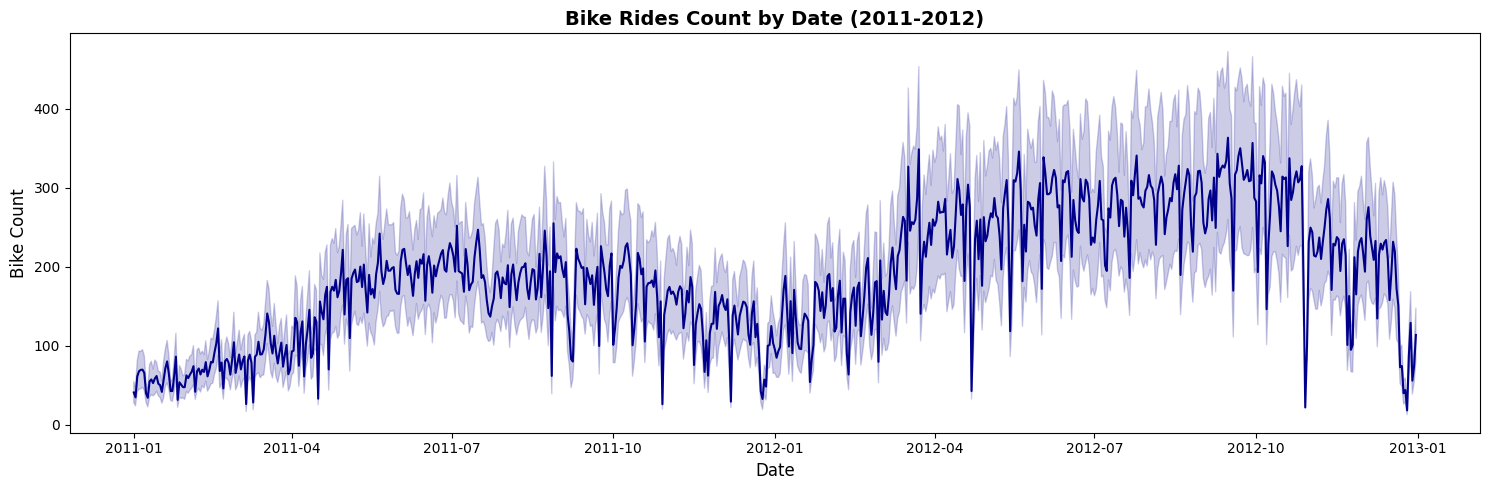

In [31]:
# Displaying lineplot of bike rides count by date
plt.figure(figsize=(15,5))
sns.lineplot(x="dteday", y="cnt", data=df, color='darkblue')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Date (2011-2012)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**RESULT** :   
* Timeseries shows a '*yearly-pattern*' of which bike rides count starts low in January, then gradually increases to its' peak around middle of the year, and decreases to its' lowest towards end of the year.
* It is also observed that bike count in 2012 is considerably higher than 2011, shows upward trend in bike rides count. 

 **2.2. Bike rides count by hour**

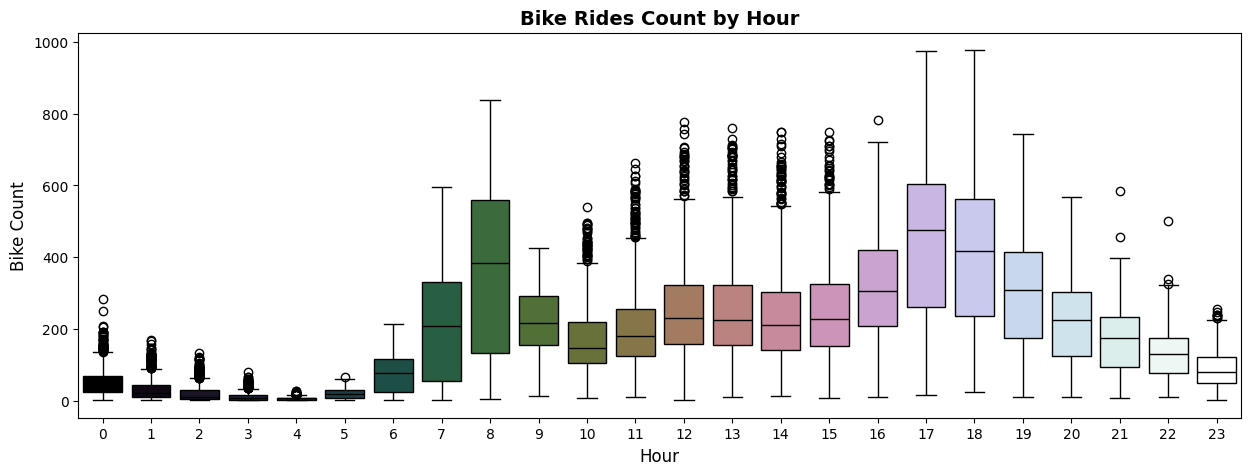

In [32]:
# Displaying boxplot of bike rides count by hour
plt.figure(figsize=(15,5))
sns.boxplot(x="hr", y="cnt", hue="hr", legend=False, data=df, palette="cubehelix")
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Hour", fontsize=14, fontweight='bold')
plt.show()

**RESULT** :
* From midnight to dawn bike count declines to its' lowest, then sharply increases to the highest count at 8am. Afterward, bike count fluctuatively goes down and up until its' second peak at 5pm. Finally, bike count gradually decreases towards midnight.
* It is also observed that peak-hours are at 8am and 5pm.

**2.3. Bike rides count by day of week**

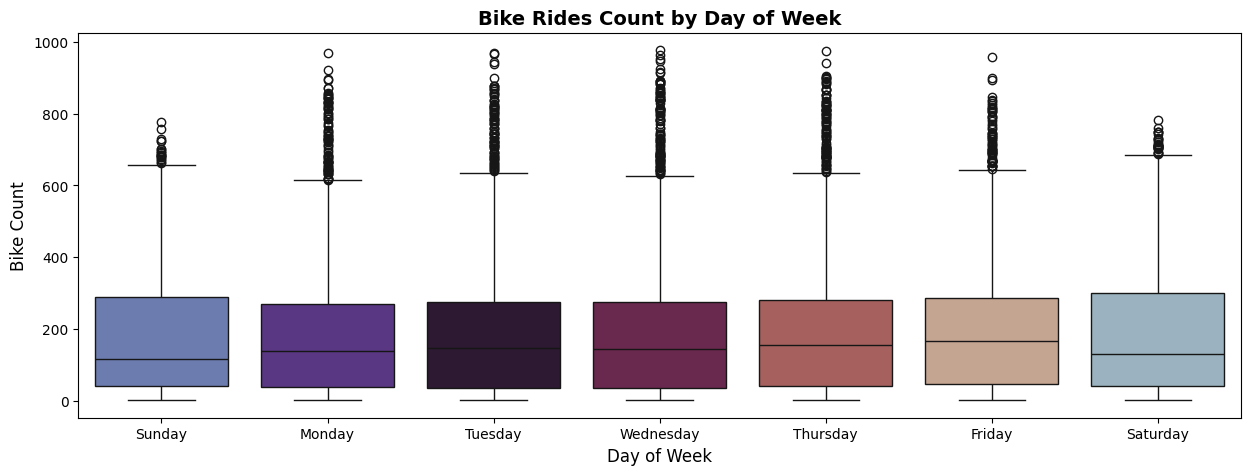

Count of Bike Count by Day of Week:
weekday
Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: count, dtype: int64


In [33]:
# Displaying boxplot of bike rides count by day of week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(15,5))
sns.boxplot(x="weekday", y="cnt", hue="weekday", legend=False, data=df, palette="twilight", order=day_order)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Day of Week", fontsize=14, fontweight='bold')
plt.show()

print('Count of Bike Count by Day of Week:')
print(df['weekday'].value_counts())

**RESULT** :
* Boxplot shows similar pattern of bike rides count during each day of week.
* It is also observed that there are outliers occur on all day of week, and the least outliers is on Saturday and Sunday.
* The most common day of bike count is on Saturday and Sunday.

**2.4. Bike rides count by type of day**

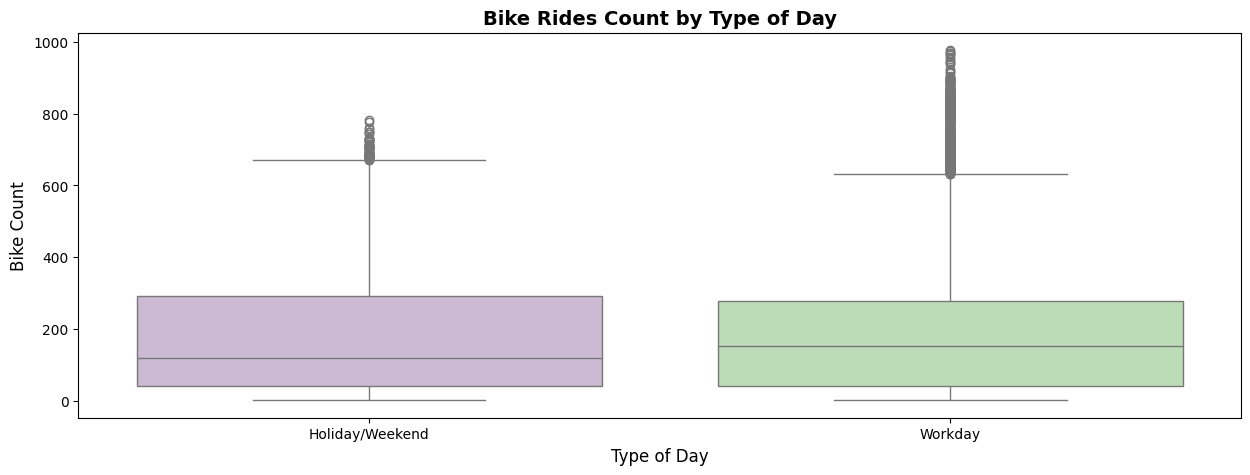

Count of Bike Count by Type of Day:
workingday
Workday            11865
Holiday/Weekend     5514
Name: count, dtype: int64


In [34]:
# Displaying boxplot of bike rides count by type of day
plt.figure(figsize=(15,5))
sns.boxplot(x="workingday", y="cnt", hue="workingday", legend=False, data=df, palette="PRGn")
plt.xlabel("Type of Day", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Type of Day", fontsize=14, fontweight='bold')
plt.show()

print('Count of Bike Count by Type of Day:')
print(df['workingday'].value_counts())

**RESULT** :
* Boxplot shows bike count is higher in workday than holiday or weekend.

**2.5. Bike rides count by month**

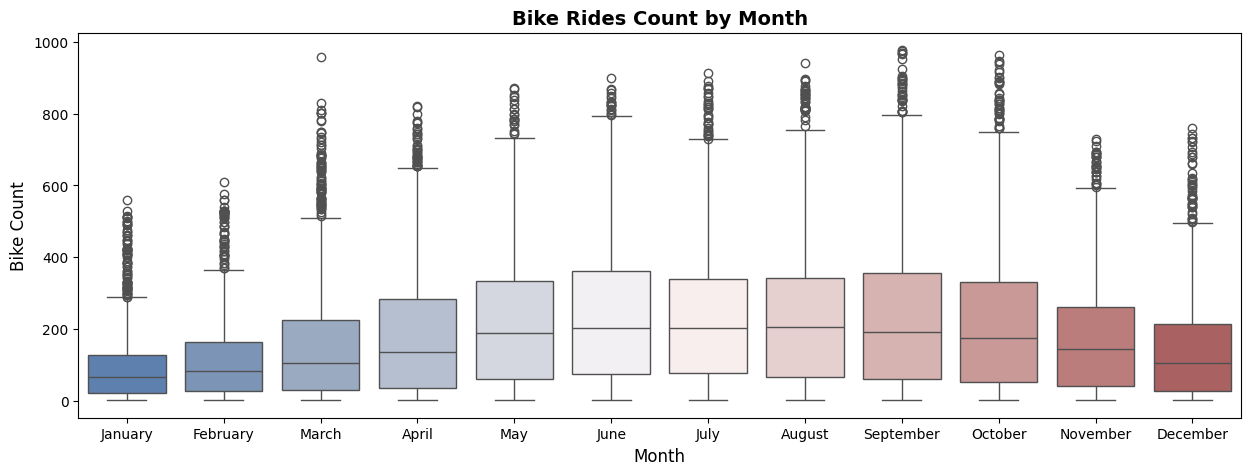

In [35]:
# Displaying boxplot of bike rides count by month
plt.figure(figsize=(15,5))
sns.boxplot(x="mnth", y="cnt", hue="mnth", legend=False, data=df, palette="vlag")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Month", fontsize=14, fontweight='bold')
plt.show()

**RESULT** :
* Boxplot confirms the '*yearly-pattern*' previously showed by lineplot of bike rides count by date.
* It is also observed that peak-month is likely from June to September.

**2.6. Bike rides count by season**

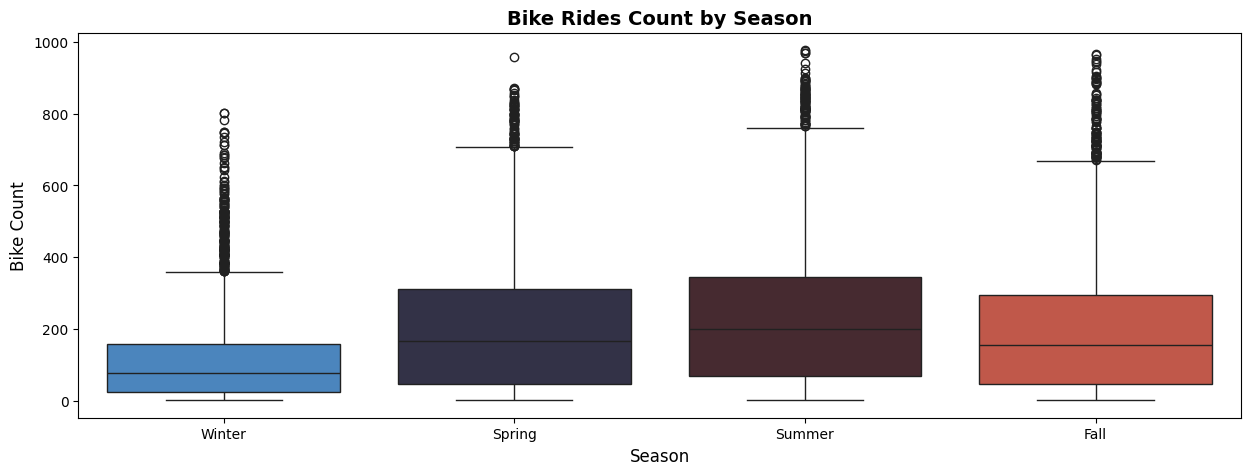

In [36]:
# Displaying boxplot of bike rides count by season
plt.figure(figsize=(15,5))
sns.boxplot(x="season", y="cnt", hue="season", legend=False, data=df, palette="icefire")
plt.xlabel("Season", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Season", fontsize=14, fontweight='bold')
plt.show()

**RESULT** :
* Boxplot shows that the highest bike count is likely in Summer, whilst the least is in Winter.
* It is also confirmed the '*yearly-pattern*' observed from previous lineplot of bike count by date.

**2.7. Bike rides count by weather situation**

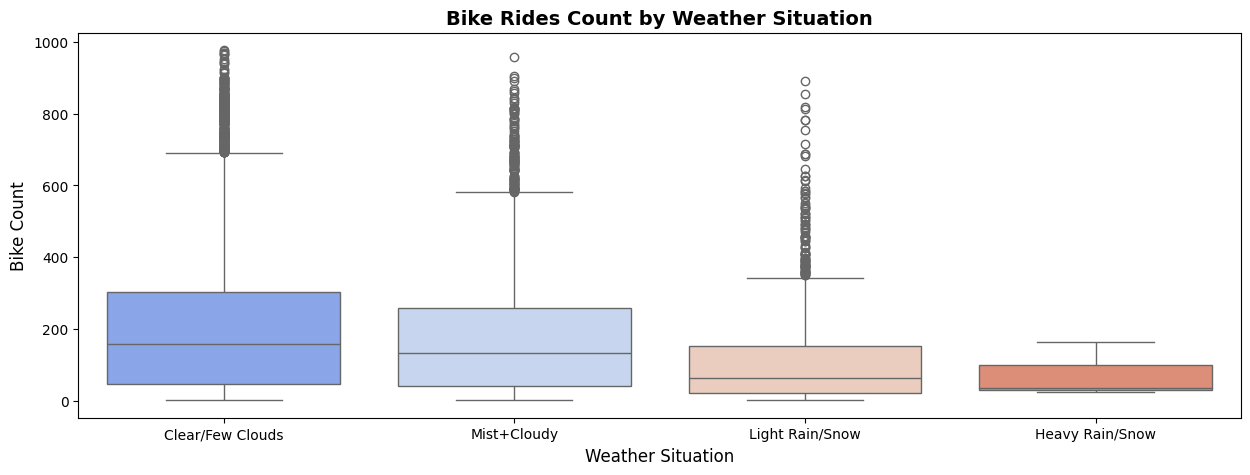

In [37]:
# Displaying boxplot of bike rides count by weather situation
plt.figure(figsize=(15,5))
sns.boxplot(x="weathersit", y="cnt", hue="weathersit", legend=False, data=df, palette="coolwarm")
plt.xlabel("Weather Situation", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Weather Situation", fontsize=14, fontweight='bold')
plt.show()

**RESULT** :
* Boxplot shows that the most common `weathersit` of bike rides is likely Clear/Few Clouds.

**2.8. Bike rides count by `mugginess` parameter** 

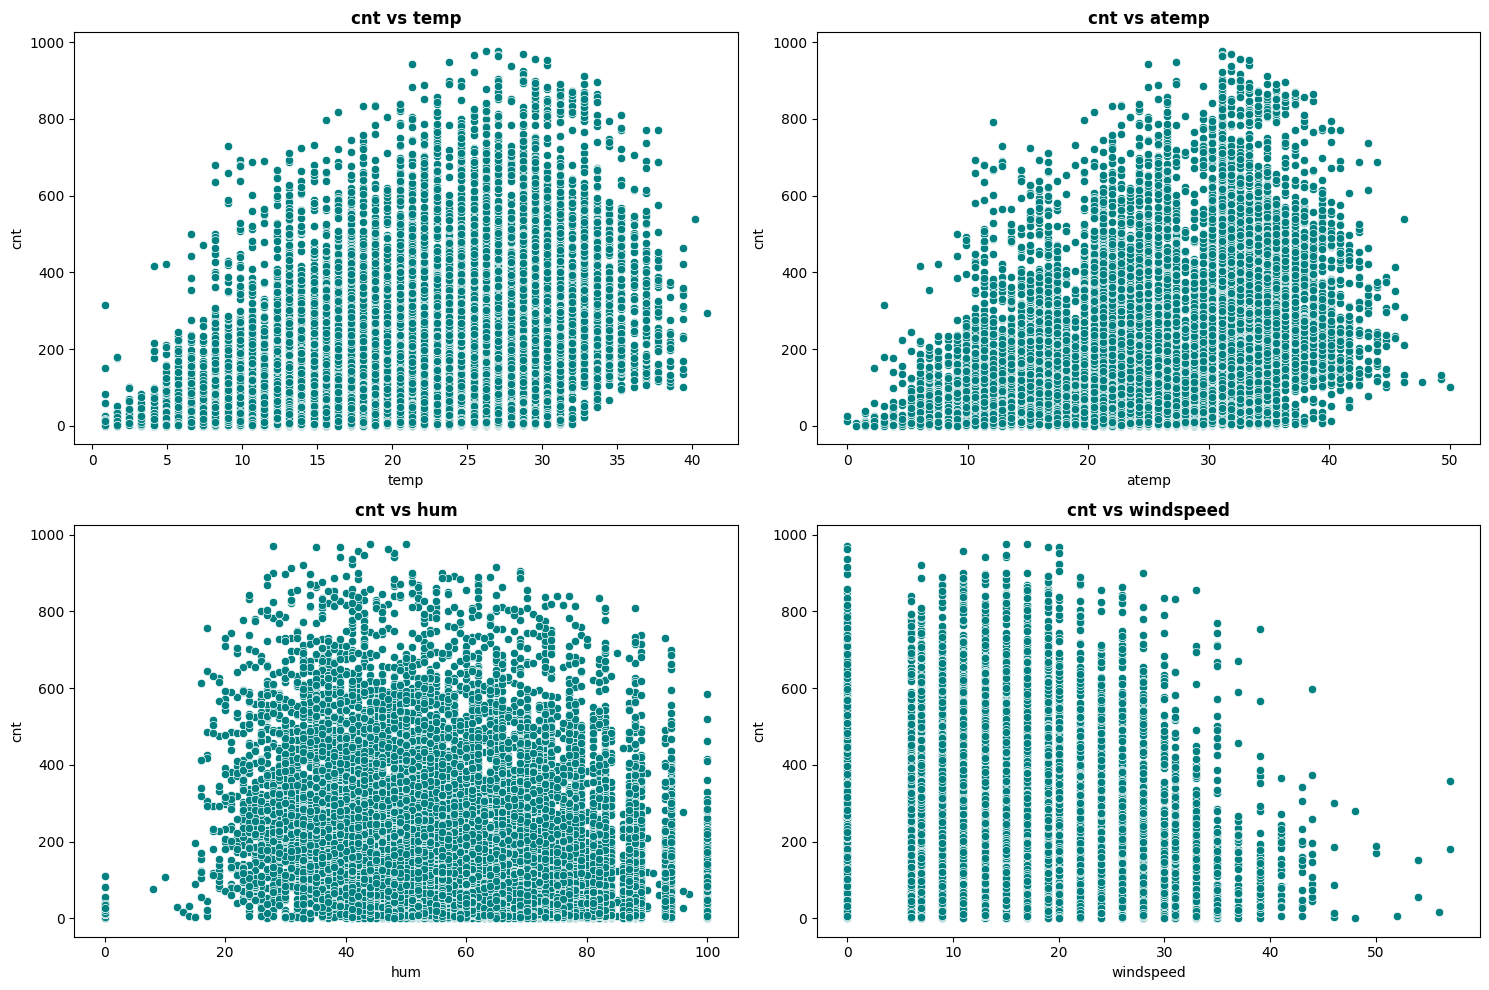

In [38]:
# Displaying bike count by mugginess parameter such as temperature, feeling temperature, humidity, and windspeed
scatter_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_scatter = df[scatter_vars]
df_scatter.head(3)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(df.columns[10:14]):
    sns.scatterplot(x=col, y='cnt', data=df, ax=axs[i // 2, i % 2], color='teal')
    axs[i // 2, i % 2].set_title(f'cnt vs {col}', fontweight='bold')
plt.tight_layout()
plt.show()

**RESULT** :
* It is observed that bike rides count increases as the temperature becomes warmer, and clockwise. There is correlation between `cnt` variable and `temp` and `atemp` variables.
* Humidity likely has no affect to bike rides count.
* Windspeed gives backward effect to bike rides count. As `windspeed` increases, bike count will declines.

**2.9. Correlation Heatmap Matrix**   
Correlation heat map is a graphical tool that displays the correlation between multiple variables as a color-coded matrix.

<Axes: >

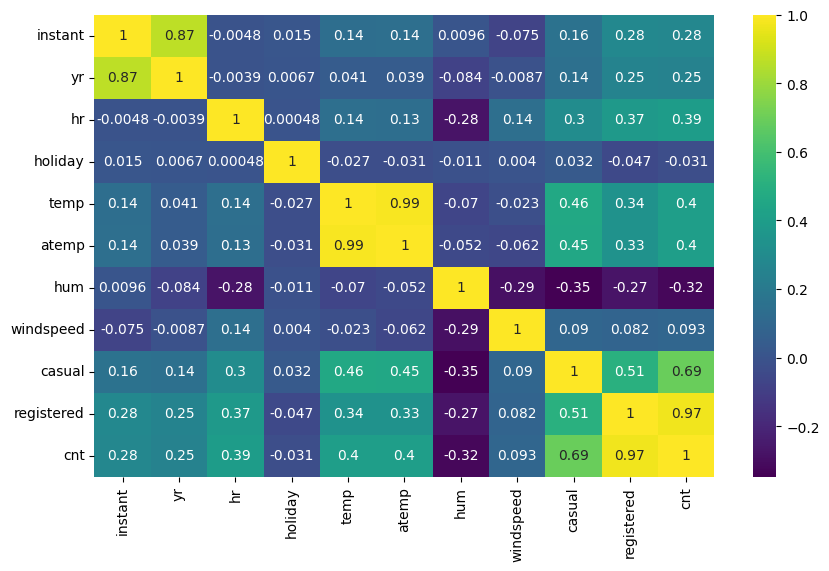

In [39]:
# Displaying correlation heat map amongst variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

**RESULT** :
* There is moderate correlation between timestamp (`hr`), temperature (`temp` and `atemp`) and bike rides count (`cnt`). 

_____

## 📖 **Visualization and Explanatory Data Analysis**

### *1. What is the trend of bike rides count during observation range of 2011-2012?*

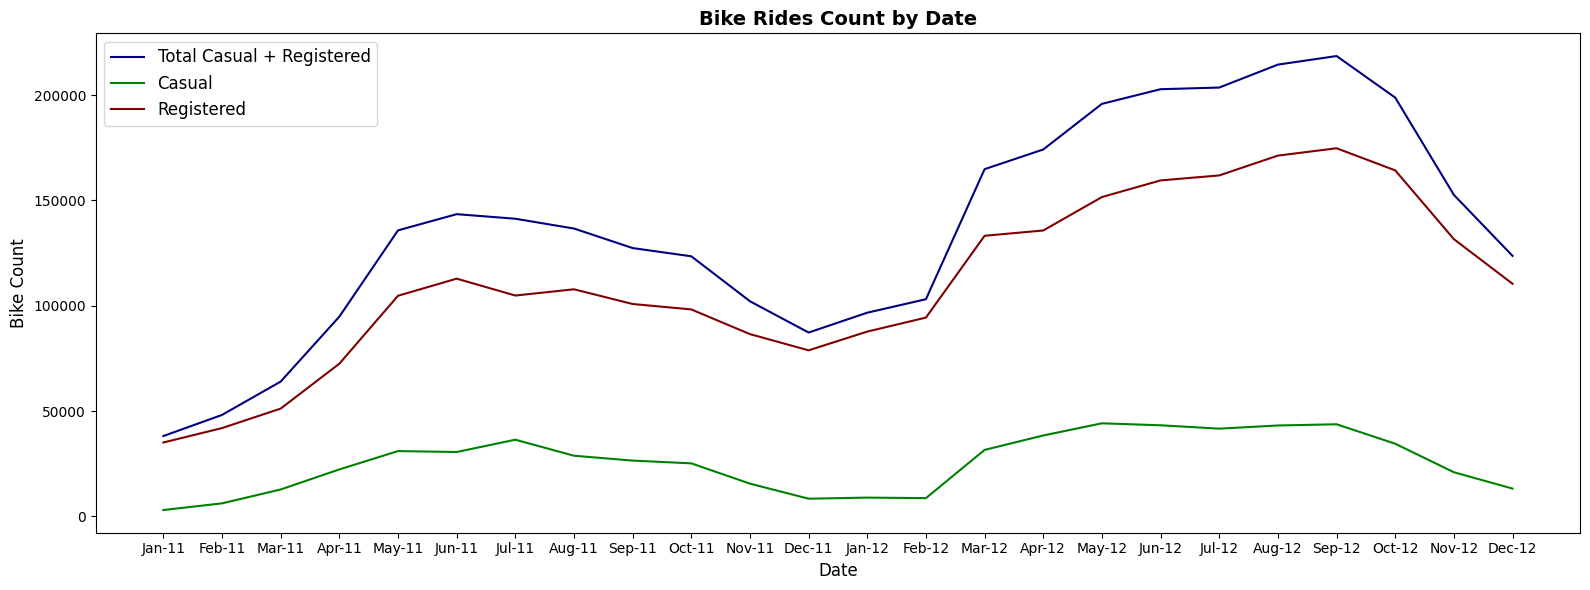

In [40]:
# Displaying trend of bike count by date
monthly_users_df = df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')
monthly_users_df = monthly_users_df.reset_index()
monthly_users_df = monthly_users_df.rename(columns={'dteday': 'yearmonth'})
plt.figure(figsize=(16,6))
sns.lineplot(x="yearmonth", y="cnt", data=monthly_users_df, color='navy', label='Total Casual + Registered')
sns.lineplot(x="yearmonth", y="casual", data=monthly_users_df, color='green', label='Casual')
sns.lineplot(x="yearmonth", y="registered", data=monthly_users_df, color='maroon', label='Registered')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Date", fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

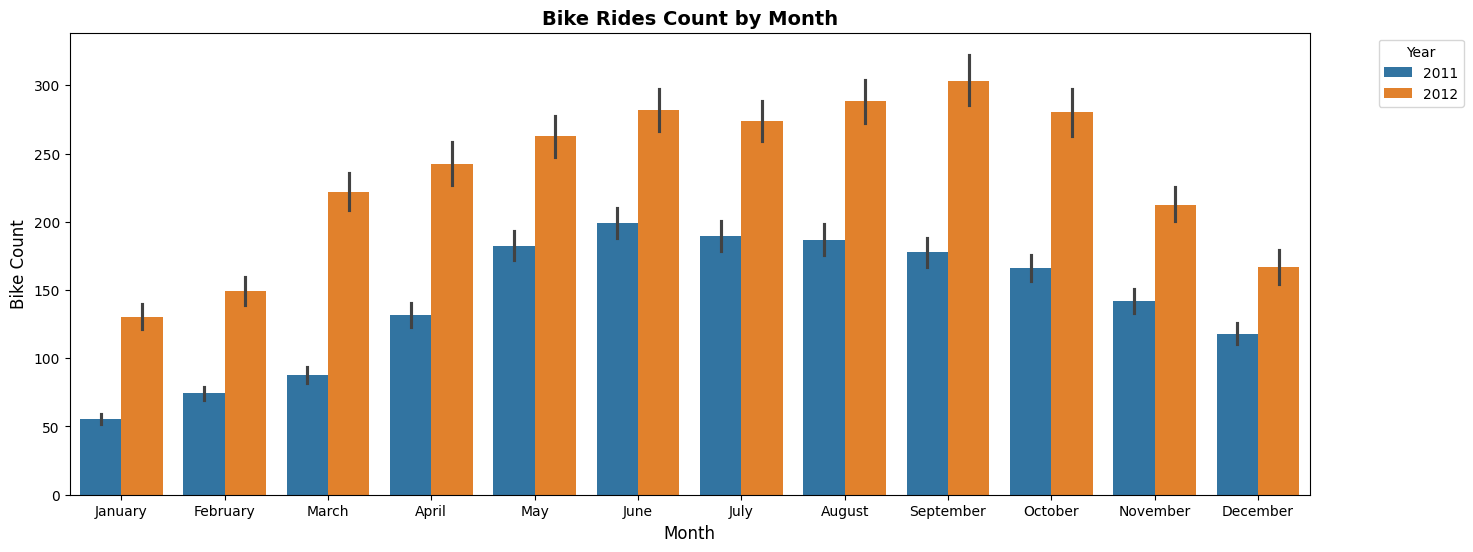

In [41]:
# Displaying barplot of bike rides count by month
plt.figure(figsize=(16,6))
sns.barplot(x='mnth', y='cnt', hue='yr', data=df, palette='tab10')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Month", fontsize=14, fontweight='bold')
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.show()

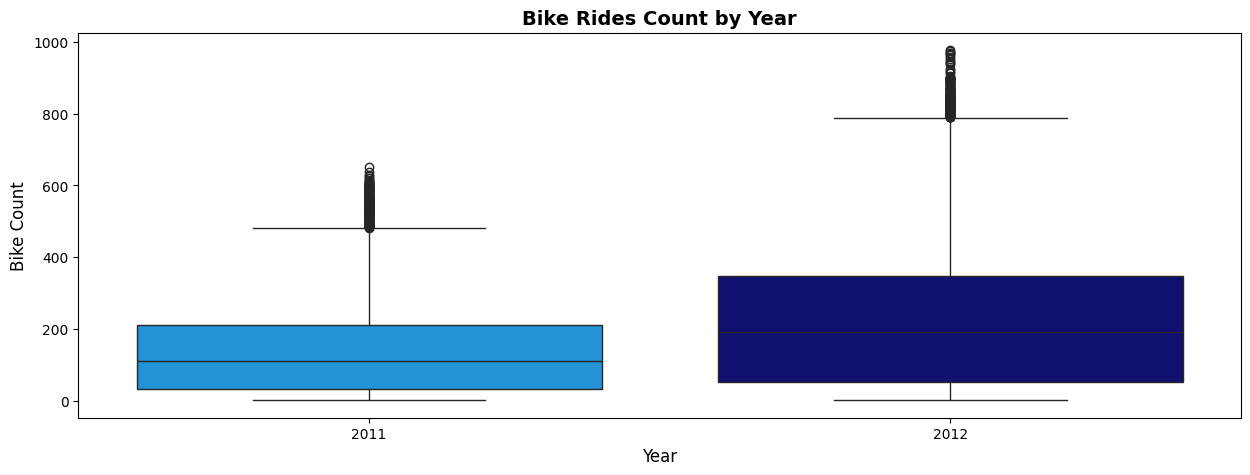

In [42]:
# Displaying boxplot of bike rides count by year
plt.figure(figsize=(15,5))
sns.boxplot(x="yr", y="cnt", hue="yr", legend=False, data=df, palette=["#069AF3", "#000080"])
plt.xlabel("Year", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Year", fontsize=14, fontweight='bold')
plt.show()

**INSIGHT**   
* There is a spike trend in the bike rides count both in 2011 and 2012, namely a '*yearly-pattern*'. Of which low bike rides count occurs in the beginning of the year, then increases up to the highest peak in the middle of the year, and afterward gradually declines towards the end of the year.
* Bike rides count in 2012 is higher than 2011, shows that bike sharing system enjoys increasing trend over years.

### *2. When do the popular times Capital Bikeshare riders ride?*

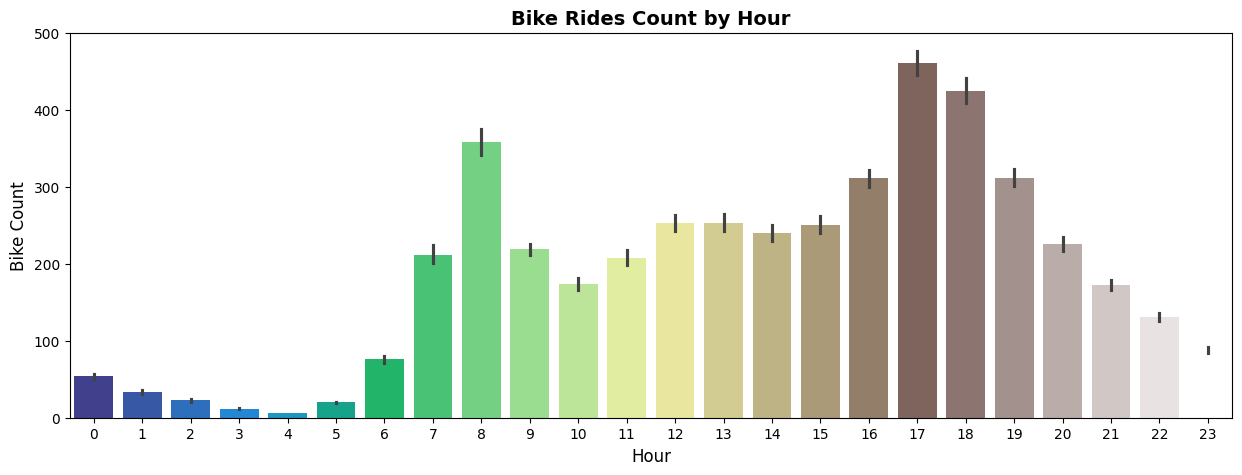

In [43]:
# Displaying the most common bike rides by hour
plt.figure(figsize=(15,5))
sns.barplot(x="hr", y="cnt", hue="hr", legend=False, data=df, palette="terrain")
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Hour", fontsize=14, fontweight='bold')
plt.show()

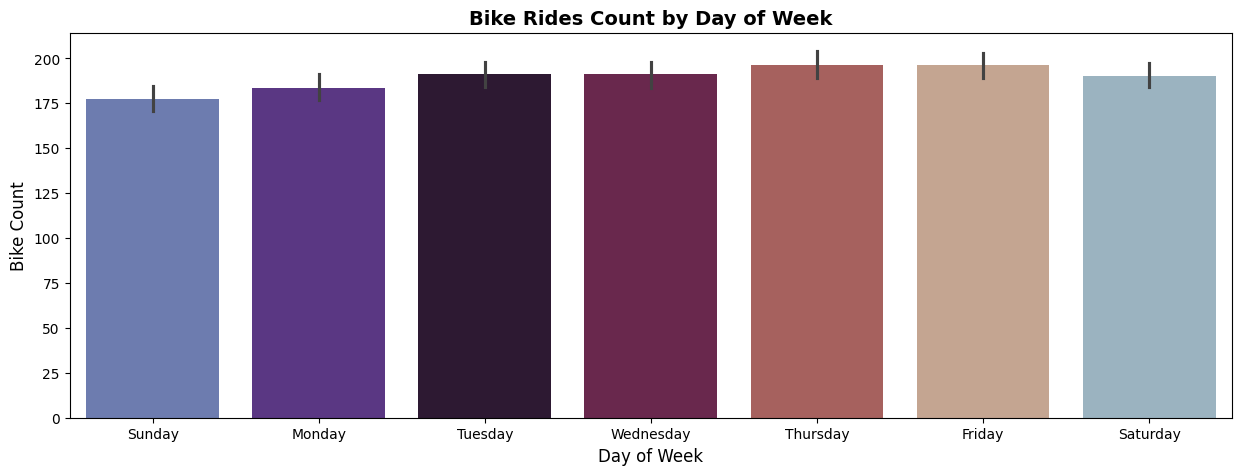

Count of Bike Count by Day of Week:
weekday
Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: count, dtype: int64


In [44]:
# Displaying the most common bike rides count by day of week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(15,5))
sns.barplot(x="weekday", y="cnt", hue="weekday", legend=False, data=df, palette="twilight", order=day_order)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Day of Week", fontsize=14, fontweight='bold')
plt.show()

print('Count of Bike Count by Day of Week:')
print(df['weekday'].value_counts())

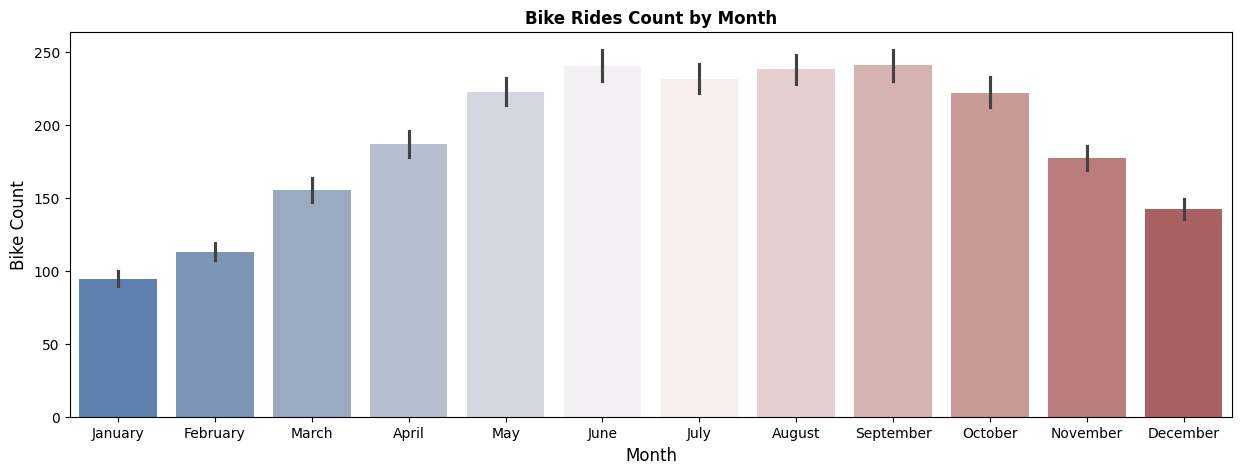

In [45]:
# Displaying the most common bike rides count by month
plt.figure(figsize=(15,5))
sns.barplot(x="mnth", y="cnt", hue="mnth", legend=False, data=df, palette="vlag")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Month", fontsize=12, fontweight='bold')
plt.show()

**INSIGHT**   
* The most popular times of the Capital Bikeshare riders ride:   
  Start hour: **5pm**   
  Day of week: **Saturday**   
  Month: **June** and **September**

### *3. How do registered members and casual riders use Capital Bikeshare bikes differently?*

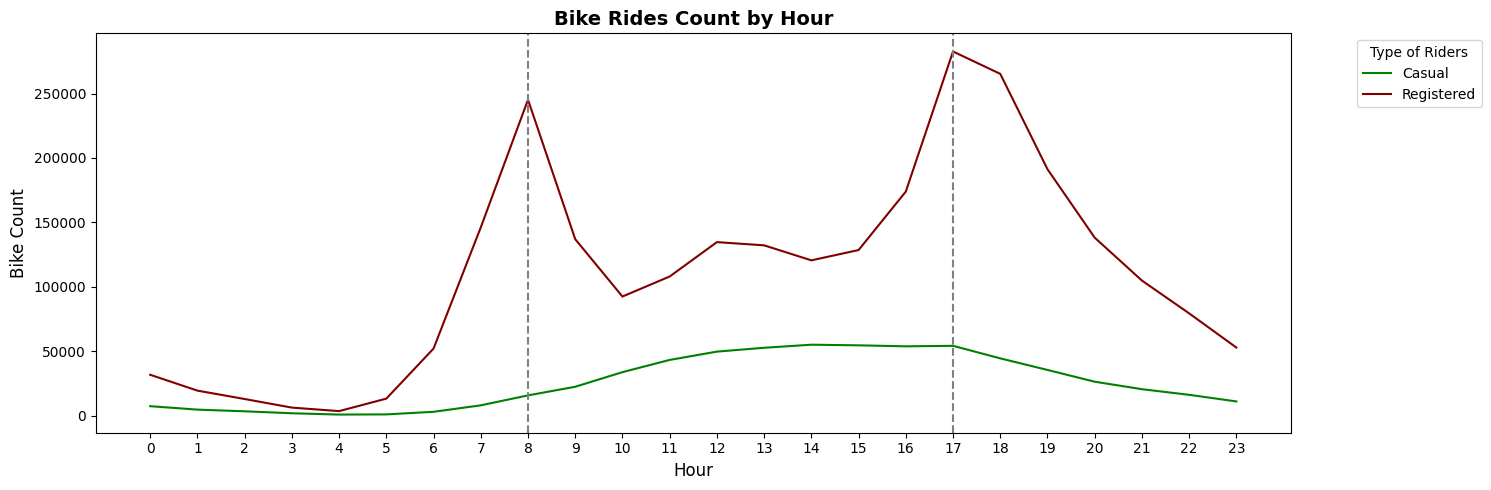

In [46]:
# Displaying the registered member's and casual riders' count by hour
hourly_users_df = df.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
hourly_users_df = hourly_users_df.reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x="hr", y="casual", data=hourly_users_df, color='green', label='Casual')
sns.lineplot(x="hr", y="registered", data=hourly_users_df, color='maroon', label='Registered')
x = np.arange(0, 24, 1)
plt.xticks(x)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Hour", fontsize=14, fontweight='bold')
plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')
plt.legend(title="Type of Riders", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()

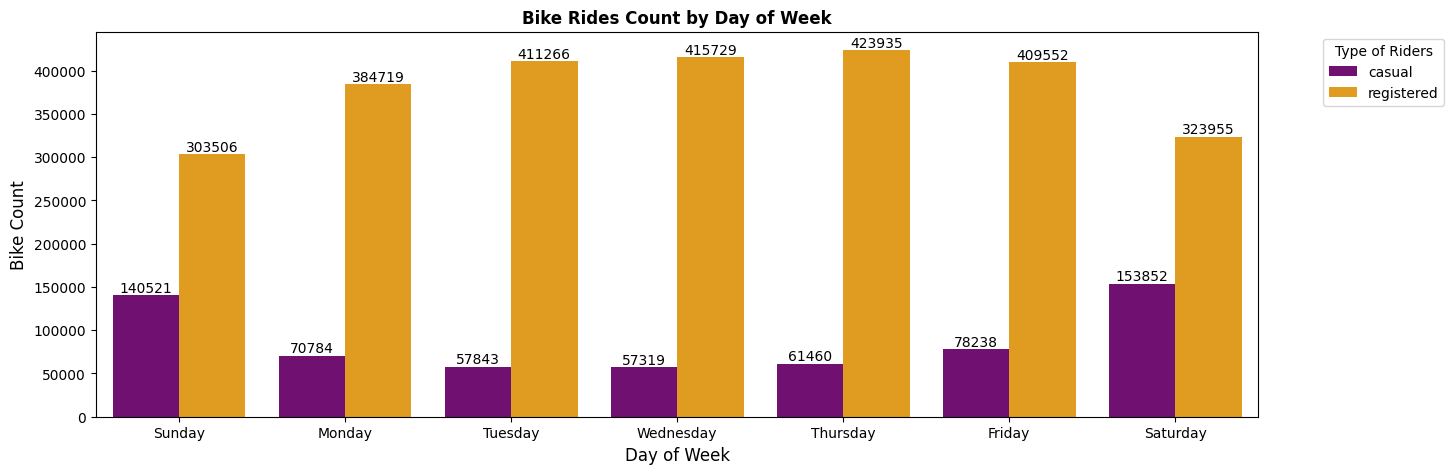

In [47]:
# Displaying the registered members' and casual riders' bike count by day of week
weekday_users_df = df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
weekday_users_df = weekday_users_df.reset_index()
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_users_df_unpivoted = pd.melt(weekday_users_df,
                                      id_vars=['weekday'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')
plt.figure(figsize=(15,5))
custom_palette = ['purple', 'orange']
splot=sns.barplot(x='weekday', y='count', data=weekday_users_df_unpivoted, order=weekday_order, hue='status', palette=custom_palette)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Day of Week", fontsize=12, fontweight='bold')
plt.bar_label(splot.containers[0],size=10)
plt.bar_label(splot.containers[1],size=10)
plt.legend(title="Type of Riders", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.show()

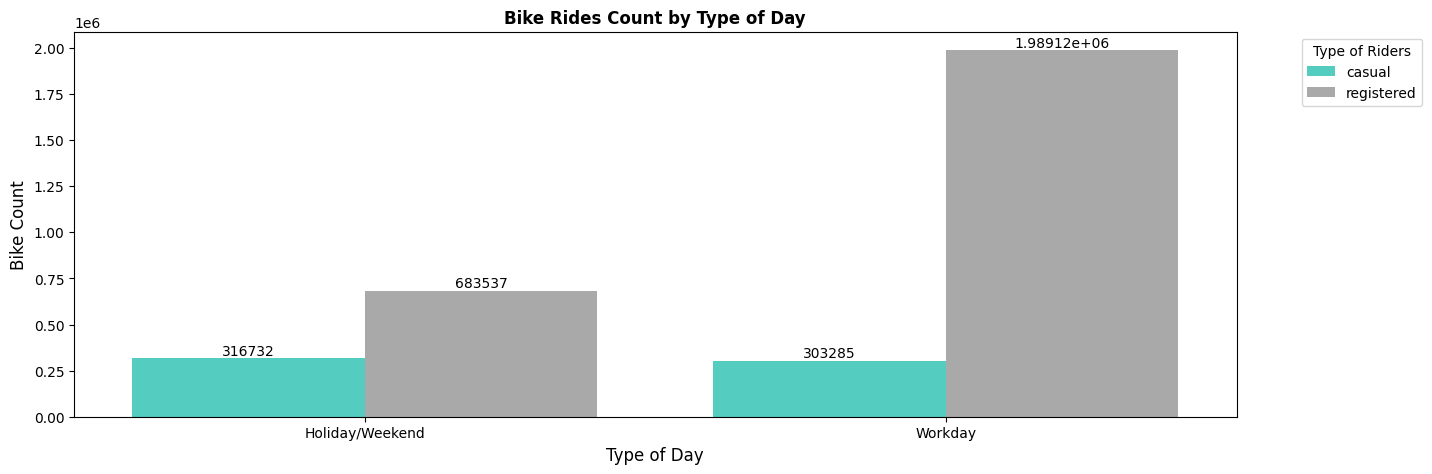

In [48]:
# Displaying the registered members' and casual riders' bike count by type of day
workingday_users_df = df.groupby("workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
workingday_users_df = workingday_users_df.reset_index()
workingday_users_df_unpivoted = pd.melt(workingday_users_df,
                                      id_vars=['workingday'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')
plt.figure(figsize=(15,5))
custom_palette = ['turquoise', 'darkgrey']
splot=sns.barplot(x='workingday', y='count', data=workingday_users_df_unpivoted, hue='status', palette=custom_palette)
plt.xlabel("Type of Day", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Type of Day", fontsize=12, fontweight='bold')
plt.bar_label(splot.containers[0],size=10)
plt.bar_label(splot.containers[1],size=10)
plt.legend(title="Type of Riders", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.show()

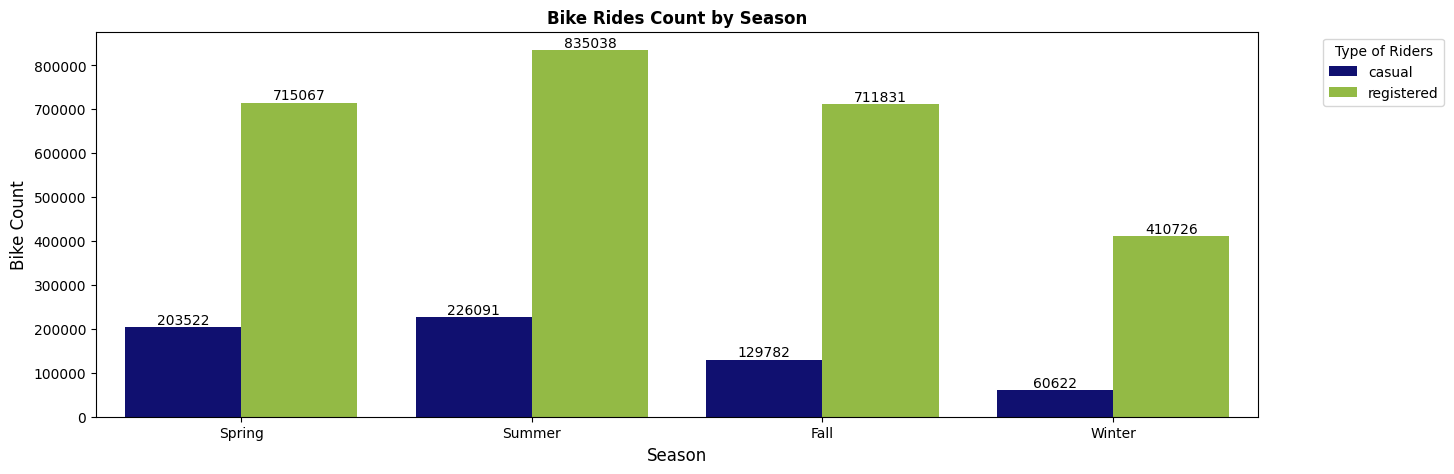

In [49]:
# Displaying the registered members' and casual riders' bike count by season
seasonly_users_df = df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df = seasonly_users_df.reset_index()
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
seasonly_users_df_unpivoted = pd.melt(seasonly_users_df,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')
plt.figure(figsize=(15,5))
custom_palette = ['navy', 'yellowgreen']
splot=sns.barplot(x='season', y='count', data=seasonly_users_df_unpivoted, order=season_order, hue='status', palette=custom_palette)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Bike Count", fontsize=12)
plt.title("Bike Rides Count by Season", fontsize=12, fontweight='bold')
plt.bar_label(splot.containers[0],size=10)
plt.bar_label(splot.containers[1],size=10)
plt.legend(title="Type of Riders", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.show()

**INSIGHT**
* There is different pattern of bike rides count between `registered members` and `casual riders`.
* Peak hour of `registered members` are at 8am and 5pm.    
* The most popular days of `registered members` are from Tuesday to Friday.
* Peak hour of `casual riders` is slightly different, of which around 2pm to 5pm.    
* The most popular days of `casual riders` are Saturday and Monday.
* It is obvious that `registered members` mostly use bike sharing for commuting from office or school, whilst `casual riders` use it for leisure during weekend and warm seasons. 

### *4. How is bike rides count per hour in function of seasons and weather conditions?*

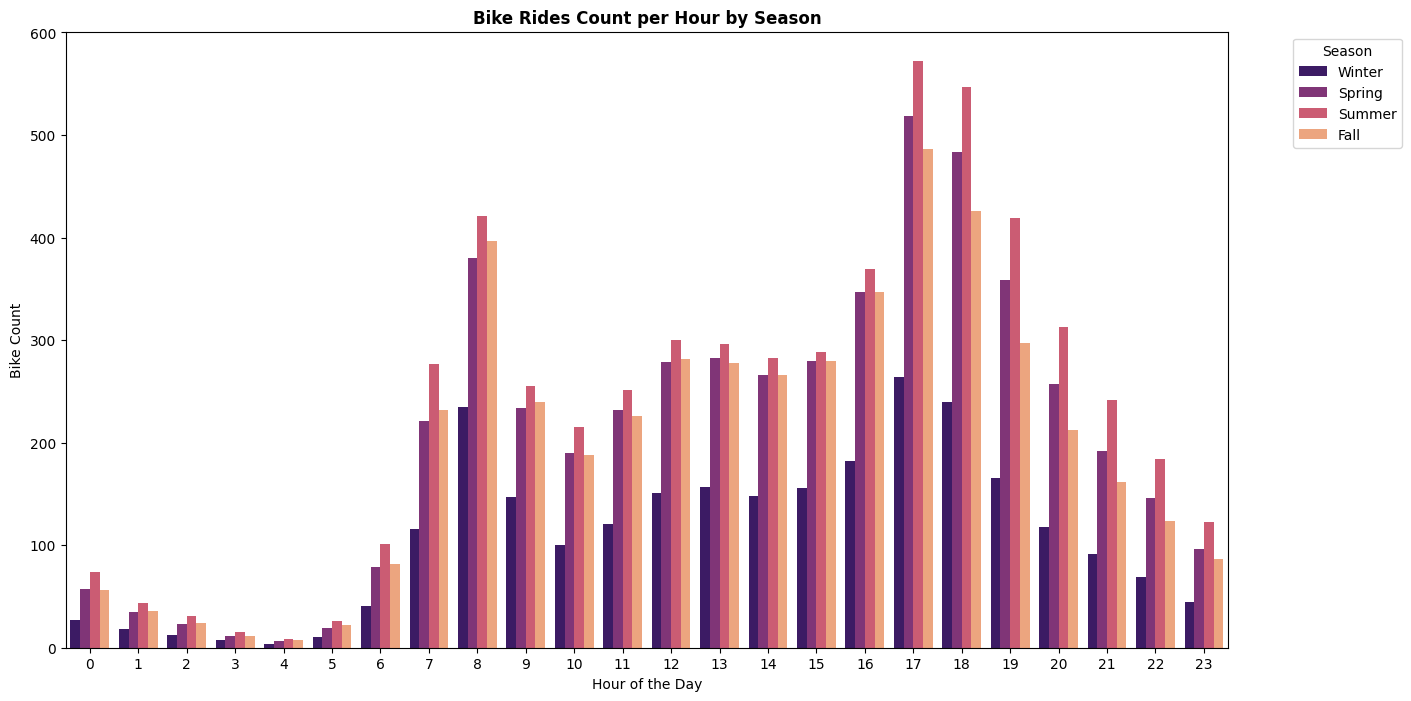

Quantity of Bike Rides Count per Hour by Season:
season  hr
Fall    0      9971
        1      6322
        2      4159
        3      2052
        4      1279
              ...  
Winter  19    29837
        20    21211
        21    16497
        22    12440
        23     7994
Name: cnt, Length: 96, dtype: int64


In [50]:
# Displaying bike rides count per hour by seasons
plt.figure(figsize=(15, 8))
sns.barplot(x='hr', y='cnt', hue='season', data=df, ci=None, palette='magma')
plt.title("Bike Rides Count per Hour by Season", fontsize=12, fontweight='bold')
plt.xlabel("Hour of the Day", fontsize=10)
plt.ylabel("Bike Count", fontsize=10)
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.show()

rides_per_hour_season = df.groupby(['season', 'hr'])['cnt'].sum()
print("Quantity of Bike Rides Count per Hour by Season:")
print(rides_per_hour_season)

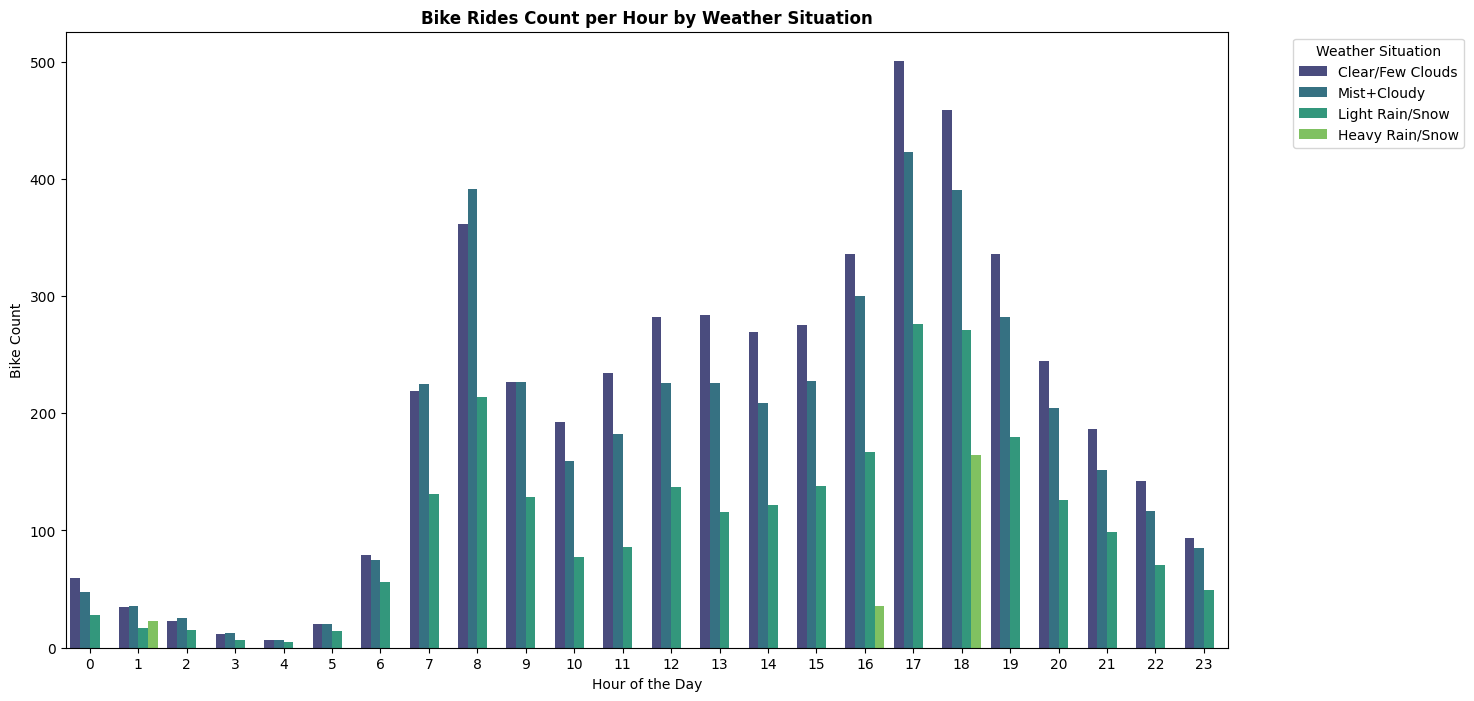

Quantity of Bike Rides Count per Hour by Weather Situation:
weathersit        hr
Clear/Few Clouds  0     28930
                  1     16854
                  2     10907
                  3      5458
                  4      2931
                        ...  
Mist+Cloudy       19    45124
                  20    28636
                  21    23987
                  22    19159
                  23    14394
Name: cnt, Length: 75, dtype: int64


In [51]:
# Displaying bike rides count per hour by weather situation
plt.figure(figsize=(15, 8))
sns.barplot(x='hr', y='cnt', hue='weathersit', data=df, ci=None, palette='viridis')
plt.title("Bike Rides Count per Hour by Weather Situation", fontsize=12, fontweight='bold')
plt.xlabel("Hour of the Day", fontsize=10)
plt.ylabel("Bike Count", fontsize=10)
plt.legend(title="Weather Situation", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.show()

rides_per_hour_weather = df.groupby(['weathersit', 'hr'])['cnt'].sum()
print("Quantity of Bike Rides Count per Hour by Weather Situation:")
print(rides_per_hour_weather)

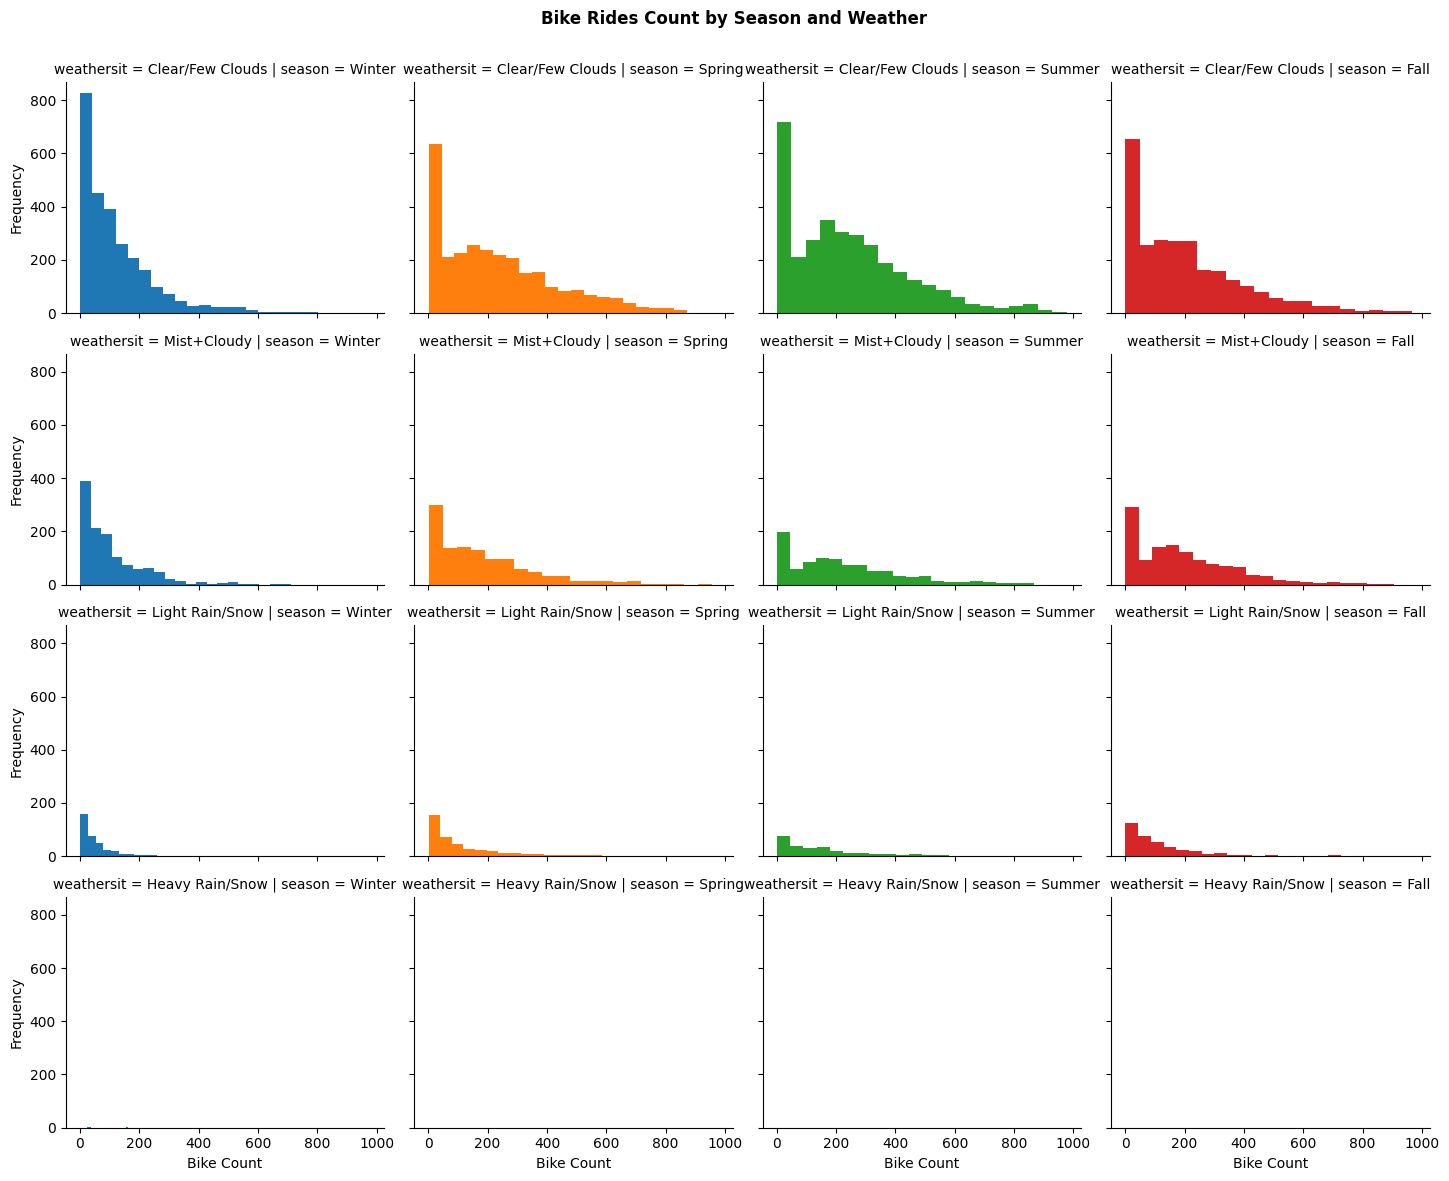

In [52]:
# Displaying bike rides count and frequency by season and weather situation
weatherly_users_df = df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
weatherly_users_df = weatherly_users_df.reset_index()
plt.rcParams['figure.figsize'] = [6.0, 6.0]
sns.set_context(font_scale=0.9)

g = sns.FacetGrid(data=df, col='season', row='weathersit', hue='season', height=3, aspect=1.2)
g.map(plt.hist,'cnt', bins=20)

plt.subplots_adjust(top=0.92)
g.fig.suptitle('Bike Rides Count by Season and Weather', fontsize=12, fontweight='bold')

g.set_xlabels('Bike Count', fontsize=10)
g.set_ylabels('Frequency', fontsize=10)

plt.show()

**INSIGHT** :
* **Seasonal Impact**
  1. During the spring and summer seasons, bike count shows a noticeable increase, with peak hours in the late morning and early afternoon.
  2. Fall and winter seasons witness a decrease in bike count, especially during colder hours.
* **Weather Situation**
  1. Clear weather tends to have a positive impact on bike count across all seasons.
  2. Misty and cloudy weather shows a moderate impact, with a slight decrease in bike count during peak hours.
  3. Adverse weather conditions, such as light snow or rain, significantly reduce bike count, especially during colder months.
* **Peak Hours**   
    Across all seasons, peak bike count hours tend to be consistent, with the highest demand occurring in the late morning and early afternoon.

____

## 📖 **Conclusion**

1. Bike rides count in 2012 is higher than 2011, shows that bike sharing system enjoys increasing trend over years. There is a spike upward trend in the bike rides count both in 2011 and 2012, suggestedly name 'yearly-pattern'. Of which low bike rides count occurs in the beginning of the year, increases up to the peak in the middle of the year, and afterward gradually declines towards the end of the year.   
2. The most popular times of the Capital Bikeshare riders ride are likely at 5 pm for start hour, on Saturday for day of week, and in June and September for month of year.   
3. There is different pattern of bike rides count between Registered Members and Casual Riders. Most of the rides are performed by Registered members of Capital Bikeshare who use them mostly for commuting purposes i.e. home to work, station, schools and so on. The use of bikes during the different hour of the day show infact that the most requested time are to be found between 7am-9am and 4pm-7pm. Casual Riders show instead a much more touristic use of bikes since their rides are taking place between 10am-8pm. By observing number of bike count on each weekday, we can conclude that Registered Members tend to ride a bike from Monday to Friday, confirming the commutation theory. Whilst Casual Riders are most active during weekend. 
4. Weather conditions and temperatures have a great impact on the use of bike sharing. Clear weather tends to have a positive impact on bike count across all seasons. Misty and cloudy weather shows a moderate impact, with a slight decrease in bike count during peak hours. Adverse weather conditions, such as light snow or rain, significantly reduce bike count, especially during colder months. While the demand is high with sunny or cloudy days, there is a significant drop in case of rain and no use at all in case of storms. This is confirmed as well from the analysis on the different seasons of the year showing winter as the season during which bikes are rarely used. Fall and winter seasons witness a decrease in bike count, especially during colder hours. During the spring and summer seasons, bike count shows a noticeable increase, with peak hours in the late morning and early afternoon. At last, a temperature analysis shows how most of the rides are taking place when temperatures are above 10 degrees Celsius.